<a href="https://colab.research.google.com/github/Fatikah002/MachineLearning/blob/main/14_Fatikah_Salsabilla_JS11_Klasterisasi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum 1

In [410]:
# Langkah 1 - Import Library
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

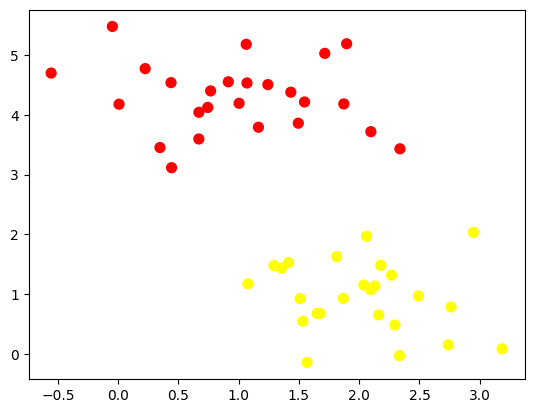

In [411]:
# Langkah 2 - Membuat Data Dummy
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

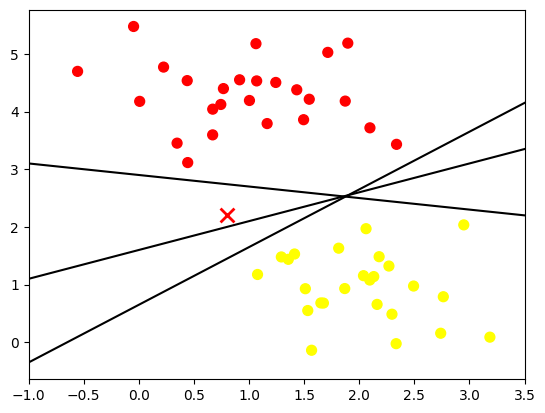

In [412]:
# Langkah 3 - Buat Ilustrasi Garis Pemisah
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')

# Menambahkan titik data baru 'x'
plt.scatter(0.8, 2.2, color='red', marker='x', s=100, linewidths=2)

plt.xlim(-1, 3.5)

(-1.0, 3.5)

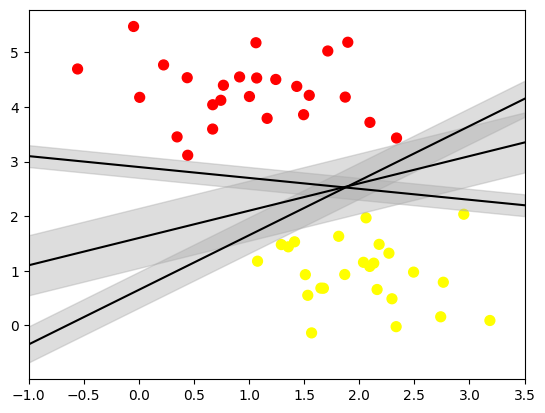

In [413]:
# Langkah 4 - Ilustrasi Margin
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [414]:
# Langkah 5 - Fitting Model
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [415]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

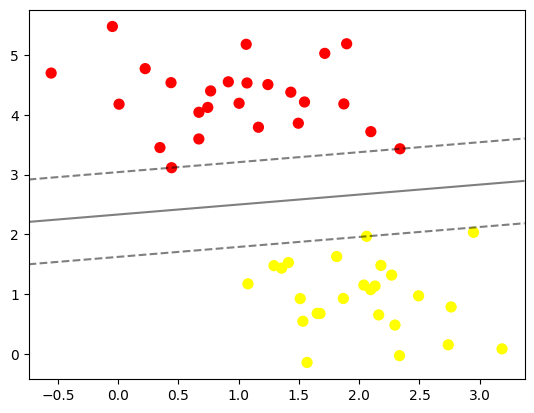

In [416]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [417]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

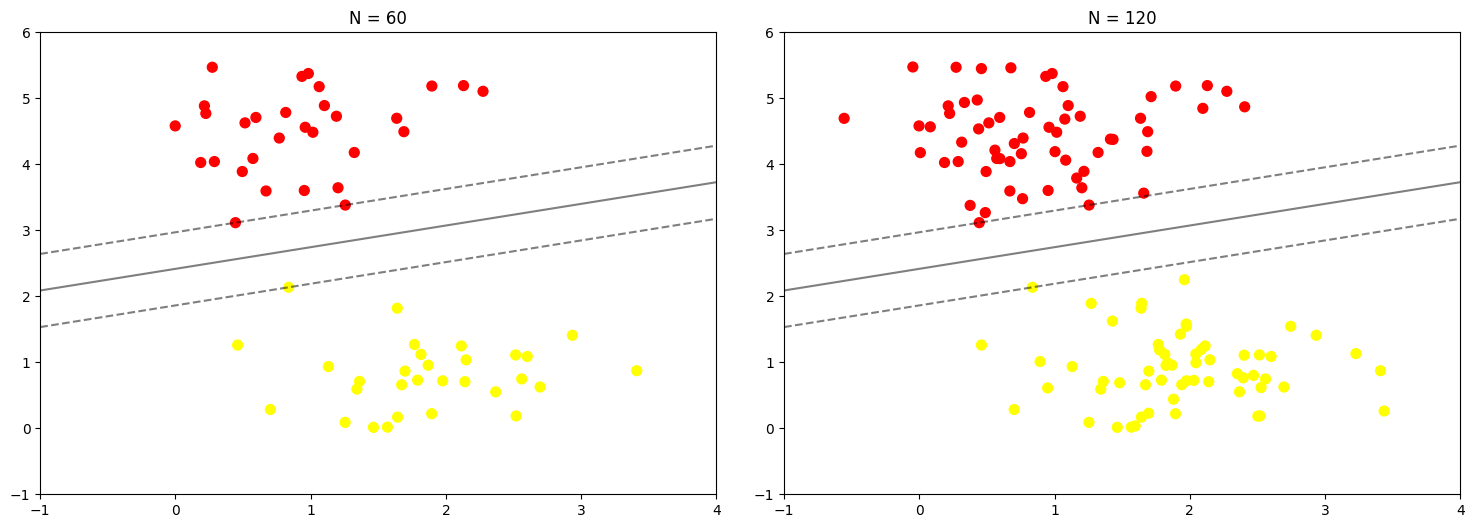

In [418]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [419]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

In [420]:
!pip install ipywidgets

## Praktikum 2

In [421]:
# Langkah 1 - Ilustrasi Data Non-Linier
# Langkah 1a - Import Library
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

In [422]:
# Langkah 1b - Buat Kembali Fungsi Plotting
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

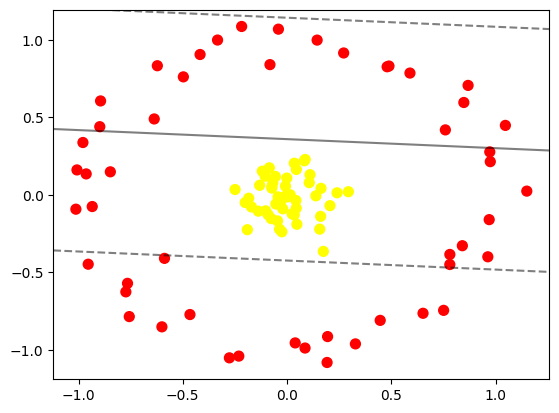

In [423]:
# Langkah 1c - Buat Data Dummy Non-Linier
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [424]:
# di comment, karena tidak bisa ditampilkan di github
# from mpl_toolkits import mplot3d
# from ipywidgets import interact, fixed
# r = X[:, 0] * 0.5 + X[:, 1] * 0.2
# def plot_3D(elev=30, azim=30, X=X, y=y):
#     ax = plt.subplot(projection='3d')
#     ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
#     ax.view_init(elev=elev, azim=azim)
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('r')

# interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
#          X=fixed(X), y=fixed(y))

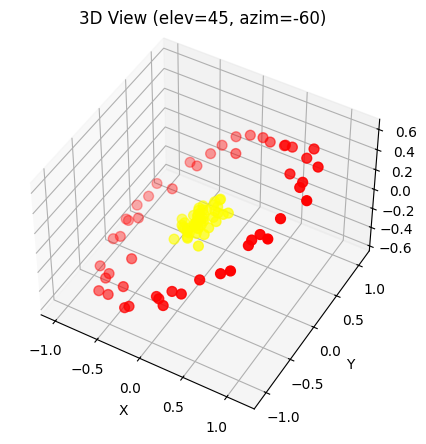

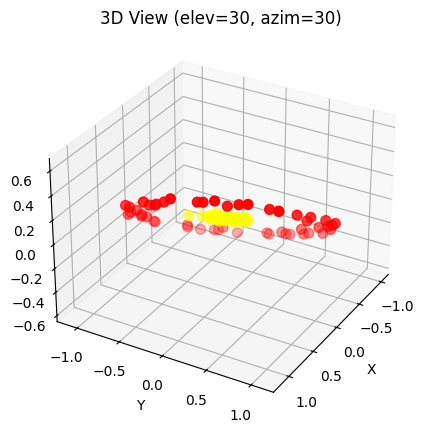

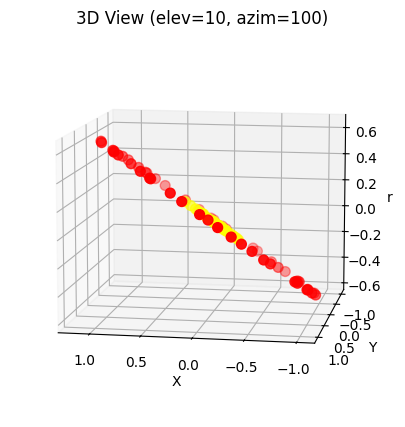

In [425]:
# Buat data tambahan 'r'
r = X[:, 0] * 0.5 + X[:, 1] * 0.2

# Fungsi untuk plot 3D statis
def plot_3D_static(X, y, elev, azim):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('r')
    plt.title(f'3D View (elev={elev}, azim={azim})')
    plt.show()

# Tampilkan beberapa sudut pandang (bisa disesuaikan)
for elev, azim in [(45, -60), (30, 30), (10, 100)]:
    plot_3D_static(X, y, elev, azim)

In [426]:
# Langkah 2 - Fitting model
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

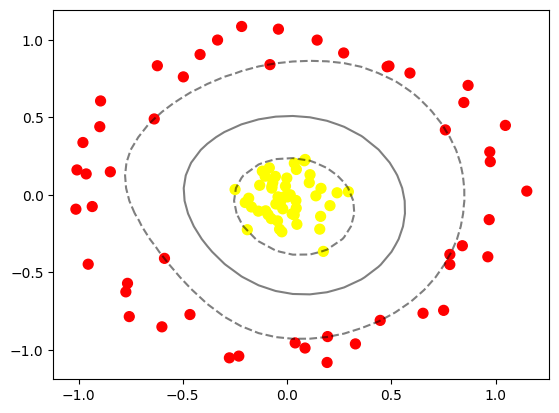

In [427]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

## Praktikum 3

In [428]:
# Langkah 1 - Import Library dan Buat Fungsi Plotting
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [429]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

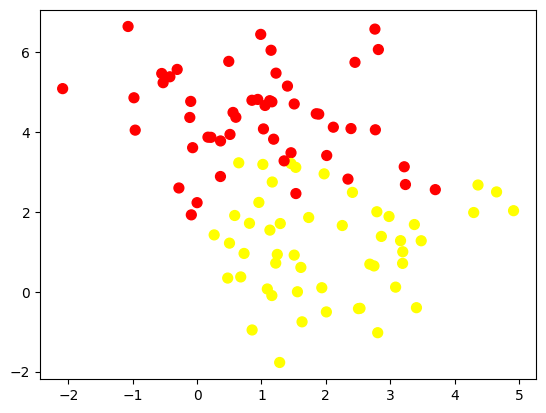

In [430]:
# Langkah 2 - Buat Data Dummy
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

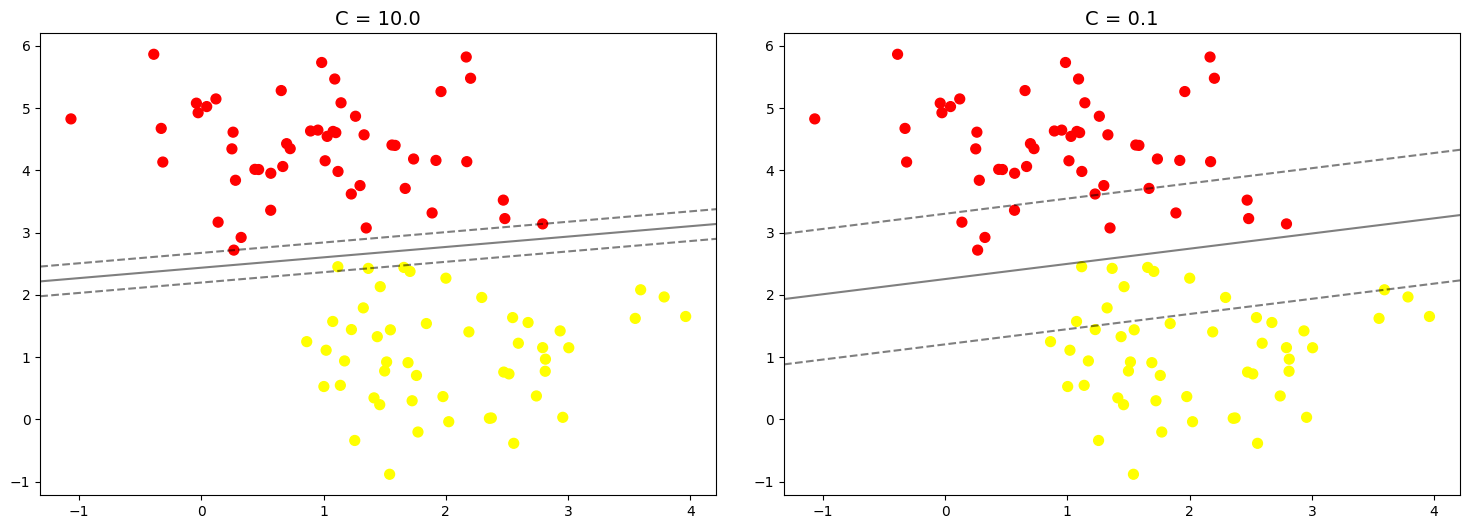

In [431]:
# Langkah 3 - Analisis Dampak Tunning
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Praktikum 4

In [432]:
# Langkah 0 - Unduh Dataset
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


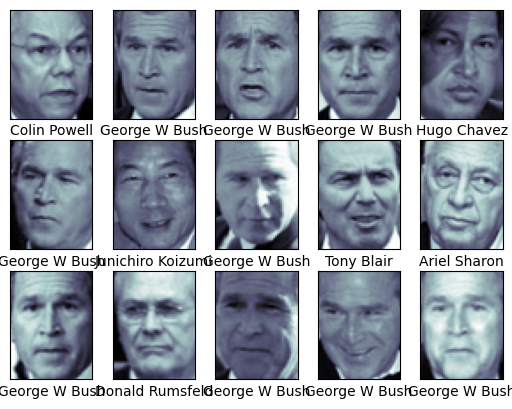

In [433]:
# Langkah 1 - Inspeksi Citra Wajah
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [434]:
# Langkah 2 - Pra Pengolahan Data
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

In [435]:
# Langkah 3 - Split data
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [365]:
# Langkah 4 - Pembuatan Model + Tunning
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 6s, sys: 118 ms, total: 2min 7s
Wall time: 1min 16s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [366]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

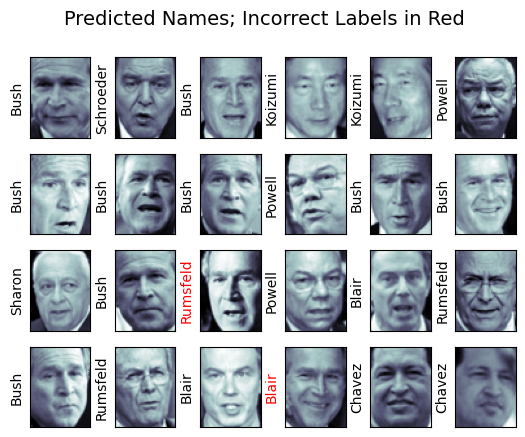

In [367]:
# Langkah 5 - Cek Hasil Prediksi
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [368]:
# Langkah 6 - Cek Performasi
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

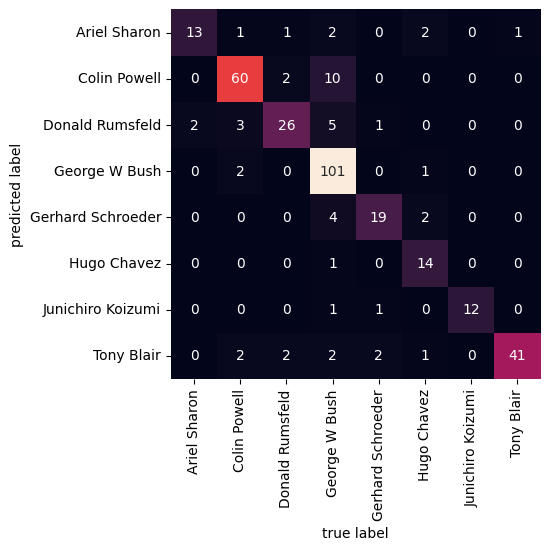

In [369]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Praktikum 5

In [370]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [371]:
# Langkah 0 - Import Library
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [372]:
# Image directories
train_dir = "/content/drive/MyDrive/Machine Learning/images/training"
test_dir = "/content/drive/MyDrive/Machine Learning/images/test"

In [373]:
# Langkah 1 - Load Data dan Visualisasikan
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [374]:
# Load training data
train_img = load_dataset(train_dir)

In [375]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[149, 162, 179],
         [146, 159, 176],
         [144, 157, 174],
         ...,
         [254, 250, 247],
         [255, 252, 249],
         [255, 254, 251]],
 
        [[152, 165, 182],
         [149, 162, 179],
         [146, 159, 176],
         ...,
         [255, 254, 250],
         [255, 252, 249],
         [251, 250, 246]],
 
        [[139, 155, 171],
         [137, 153, 169],
         [134, 150, 166],
         ...,
         [248, 248, 246],
         [255, 255, 253],
         [255, 255, 253]],
 
        ...,
 
        [[102,  88,  77],
         [100,  86,  75],
         [ 98,  84,  73],
         ...,
         [ 73,  71,  74],
         [ 73,  71,  74],
         [ 72,  70,  73]],
 
        [[102,  88,  77],
         [100,  86,  75],
         [ 99,  85,  74],
         ...,
         [ 73,  71,  74],
         [ 73,  71,  74],
         [ 72,  70,  73]],
 
        [[102,  88,  77],
         [100,  86,  75],
         [ 99,  85,  74],
         ...,
         [ 74,  72,  75],
  

In [376]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 139
(458, 800, 3)


In [377]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (372, 640, 3)
Label	: night


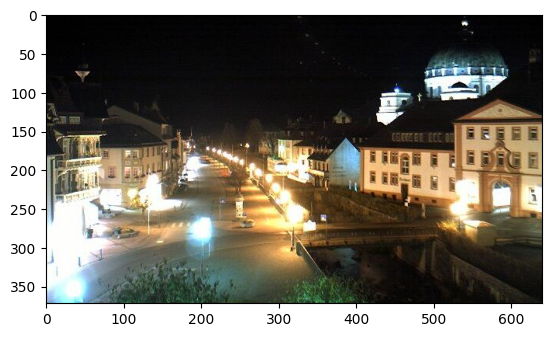

In [378]:
random_img_viz(train_img)

In [379]:
# Langkah 3 - Pra Pengolahan Data
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [380]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [381]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [382]:
train_std_img_list = preprocess(train_img)

In [383]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 203
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 1


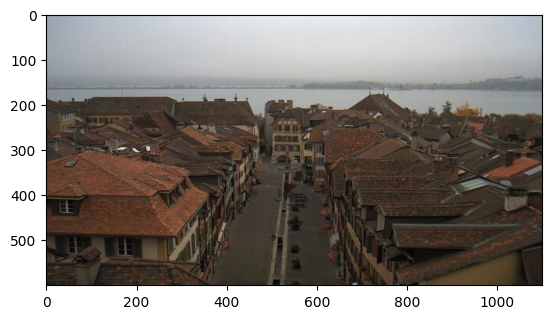

In [384]:
random_img_viz(train_std_img_list)

In [385]:
# Langkah 4 - Ekstraksi Fitur
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 89
Avg Brighness: 155.3195


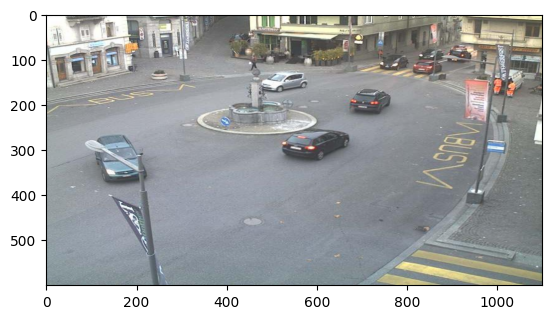

In [386]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

In [387]:
# Langkah 5 - Klasifikasi dengan Metode Threshold
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 192
Actual label: 0
Predicted label: 0


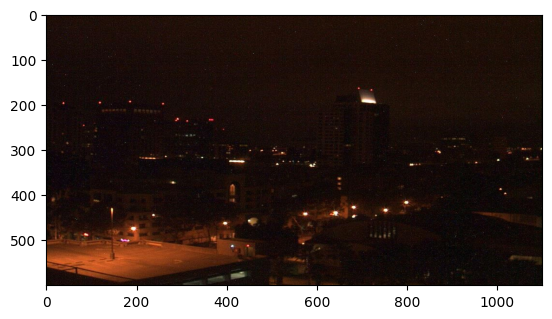

In [388]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [389]:
# Langkah 6 - Evaluasi Manual
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [390]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [391]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


## Klasifikasi dengan SVM

hanya mengubah mulai langkah ke-**4**

In [392]:
# Langkah 4 Alternatif - Membuat Feature Vectors
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [393]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,107.579145,1.0
1,132.202408,1.0
2,103.998085,1.0
3,139.786038,1.0
4,116.275882,1.0


In [394]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,95.458935,0.0
1,88.064115,0.0
2,106.477718,0.0
3,93.822077,0.0
4,175.582911,0.0


In [395]:
# Langkah 5 - Buat Model SVM
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

In [396]:
# Langkah 6 - Evaluasi
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


## Tugas Praktikum


1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,
  
    a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.
        
        i. Gunakan model dengan kernel linier.
        ii. Gunakan model dengan kernel polynomial.
        iii. Gunakan model dengan kernel RBF.

    b. Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

In [397]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/voice.csv')

In [398]:
# Pisahkan fitur (X) dan label (y)
X = df.drop('label', axis=1)
y = df['label']

In [399]:
# Encoding label dan standarisasi fitur
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
y = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [400]:
# Split data (70:30 dan 80:20)
splits = {
    "70:30": train_test_split(X_scaled, y, test_size=0.3, random_state=42),
    "80:20": train_test_split(X_scaled, y, test_size=0.2, random_state=42)
}

In [401]:
# Buat model SVM dengan 3 kernel berbeda
kernels = ["linear", "poly", "rbf"]
results = []

for ratio, (X_train, X_test, y_train, y_test) in splits.items():
    for k in kernels:
        model = SVC(kernel=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({
            "Split": ratio,
            "Kernel": k,
            "Akurasi": round(acc, 4)
        })


In [402]:
hasil = pd.DataFrame(results)
print("\n=== Tabel Perbandingan Akurasi SVM ===")
print(hasil)


=== Tabel Perbandingan Akurasi SVM ===
   Split  Kernel  Akurasi
0  70:30  linear   0.9706
1  70:30    poly   0.9569
2  70:30     rbf   0.9811
3  80:20  linear   0.9763
4  80:20    poly   0.9685
5  80:20     rbf   0.9826


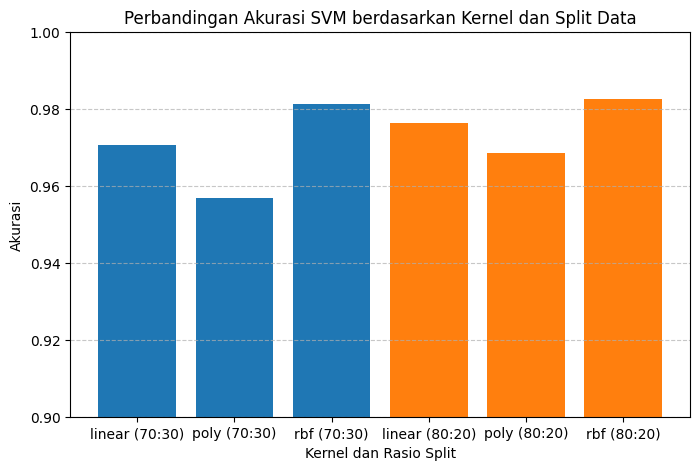

In [403]:
plt.figure(figsize=(8,5))
for split in hasil["Split"].unique():
    subset = hasil[hasil["Split"] == split]
    plt.bar(subset["Kernel"] + " (" + split + ")", subset["Akurasi"], label=split)

plt.title("Perbandingan Akurasi SVM berdasarkan Kernel dan Split Data")
plt.xlabel("Kernel dan Rasio Split")
plt.ylabel("Akurasi")
plt.ylim(0.9, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

In [404]:
# Load Dataset
train_dir = "/content/drive/MyDrive/Machine Learning/images/training"
test_dir = "/content/drive/MyDrive/Machine Learning/images/test"

# Fungsi untuk memuat dataset
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')
    img_list = []
    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if img is not None:
                img_list.append((img, label))
    return img_list

# Gabungkan train dan test agar bisa di-split 80:20
train_img = load_dataset(train_dir)
test_img = load_dataset(test_dir)
all_img = train_img + test_img
print(f"Total images: {len(all_img)}")

Total images: 400


In [405]:
# Pra Pengolahan Data
def standarized_input(image):
    return cv2.resize(image, (1100, 600))

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    std_img_list = []
    for img, label in img_list:
        std_img = standarized_input(img)
        num_label = label_encoder(label)
        std_img_list.append((std_img, num_label))
    return std_img_list

processed_img = preprocess(all_img)


In [406]:
# Ekstraksi Fitur Histogram
def extract_hist_feature(image):
    # Konversi ke HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Ambil histogram untuk setiap channel (H, S, V)
    hist_h = cv2.calcHist([hsv], [0], None, [32], [0, 256])
    hist_s = cv2.calcHist([hsv], [1], None, [32], [0, 256])
    hist_v = cv2.calcHist([hsv], [2], None, [32], [0, 256])

    # Normalisasi dan gabungkan
    hist = np.concatenate((hist_h, hist_s, hist_v)).flatten()
    hist = hist / np.sum(hist)
    return hist

# Buat dataset fitur
features = []
labels = []
for img, label in processed_img:
    feat = extract_hist_feature(img)
    features.append(feat)
    labels.append(label)

features = np.array(features)
labels = np.array(labels)
print("Feature shape:", features.shape)


Feature shape: (400, 96)


In [407]:
# Split Data (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels
)

In [408]:
# Model SVM RBF
# Coba beberapa kombinasi parameter RBF
params = [
    {'C': 1, 'gamma': 'scale'},
    {'C': 10, 'gamma': 'scale'},
    {'C': 1, 'gamma': 0.01},
    {'C': 10, 'gamma': 0.01},
]

results = []

for p in params:
    model = SVC(kernel='rbf', C=p['C'], gamma=p['gamma'])
    model.fit(X_train, y_train)

    # Evaluasi
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    results.append({
        'C': p['C'],
        'gamma': p['gamma'],
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    })

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print(results_df)


    C  gamma  Train Accuracy  Test Accuracy
0   1  scale        0.996875            1.0
1  10  scale        1.000000            1.0
2   1   0.01        0.862500            0.9
3  10   0.01        0.862500            0.9


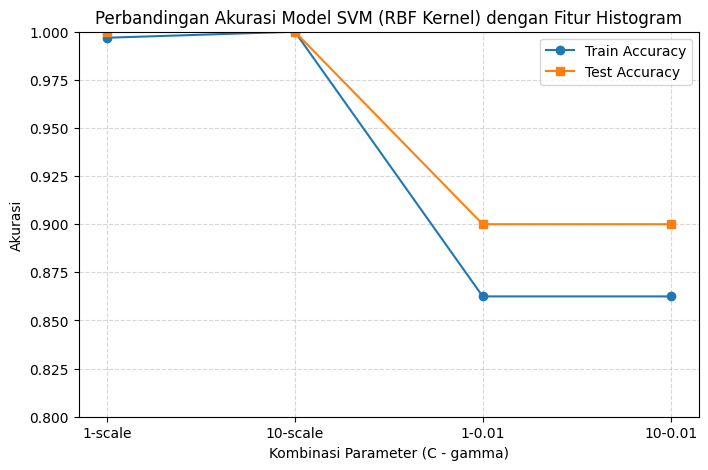

In [409]:
# Plot perbandingan akurasi
plt.figure(figsize=(8,5))
plt.plot(results_df['C'].astype(str) + "-" + results_df['gamma'].astype(str),
         results_df['Train Accuracy'], marker='o', label='Train Accuracy')
plt.plot(results_df['C'].astype(str) + "-" + results_df['gamma'].astype(str),
         results_df['Test Accuracy'], marker='s', label='Test Accuracy')

plt.title("Perbandingan Akurasi Model SVM (RBF Kernel) dengan Fitur Histogram")
plt.xlabel("Kombinasi Parameter (C - gamma)")
plt.ylabel("Akurasi")
plt.ylim(0.8, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()